In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import joblib

Preprocessing data

In [3]:
df = pd.read_csv('cardekho.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [4]:
df.shape

(8128, 12)

In [5]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [6]:
columns_names = df.columns
columns_names

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [8]:
preprocessed_df = deepcopy(df)
preprocessed_df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [9]:
preprocessed_df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

name - Name of the car (example, brand)

year - The year of manufacture of the car

selling_price - The selling price of the car in the local currency.

km_driven - The total kilometers driven by the car.

fuel - The type of fuel used by the car (example diesal or petrol) (0 is diesal, 1 is petrol)

seller_type - The type of seller (example individual or dealer) (0 is individual, 1 is dealer)

transmission - The transmission type of the car (example auto or manual) (0 is manual, 1 is auto)

owner - The number of previous owners of the car. (example first hand, second hand) (0 is first hand, 1 is second hand, 2 is third hand, 3 is fourth or more)

mileage(km/ltr/kg) - The mileage or fuel efficiency of the car. 


engine - The engine specifications of the car

In [10]:
preprocessed_df.isnull().sum()

#mileage, engine max_power and seats have missing values
#ill fill the values with the average of each column
preprocessed_df['mileage(km/ltr/kg)'].fillna(preprocessed_df['mileage(km/ltr/kg)'].mean(), inplace=True)
preprocessed_df['engine'].fillna(preprocessed_df['engine'].mean(), inplace=True)
preprocessed_df['seats'].fillna(preprocessed_df['seats'].mean(), inplace=True)

#preprocessed_df['max_power'].fillna(preprocessed_df['max_power'].mean(), inplace=True)
#this had an error because the column is an object type

C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\3088125340.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preprocessed_df['mileage(km/ltr/kg)'].fillna(preprocessed_df['mileage(km/ltr/kg)'].mean(), inplace=True)
C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\3088125340.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [11]:
preprocessed_df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [12]:
preprocessed_df['max_power'] = pd.to_numeric(preprocessed_df['max_power'], errors='coerce')

# Calculate the average of the for max power
average_max_power = preprocessed_df['max_power'].mean()
preprocessed_df['max_power'].fillna(average_max_power, inplace=True)

C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\475571928.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preprocessed_df['max_power'].fillna(average_max_power, inplace=True)


In [13]:
preprocessed_df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [14]:
preprocessed_df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
dtype: object

In [15]:
#currently name, fuel, seller type, tranmission and owner are object types
#ill feature engineer new variables for these columns
print("Fuel: ", preprocessed_df['fuel'].unique())
print("Seller Type: ", preprocessed_df['seller_type'].unique())
print("Transmission: ", preprocessed_df['transmission'].unique())
print("Owner: ", preprocessed_df['owner'].unique())

Fuel:  ['Diesel' 'Petrol' 'LPG' 'CNG']
Seller Type:  ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission:  ['Manual' 'Automatic']
Owner:  ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


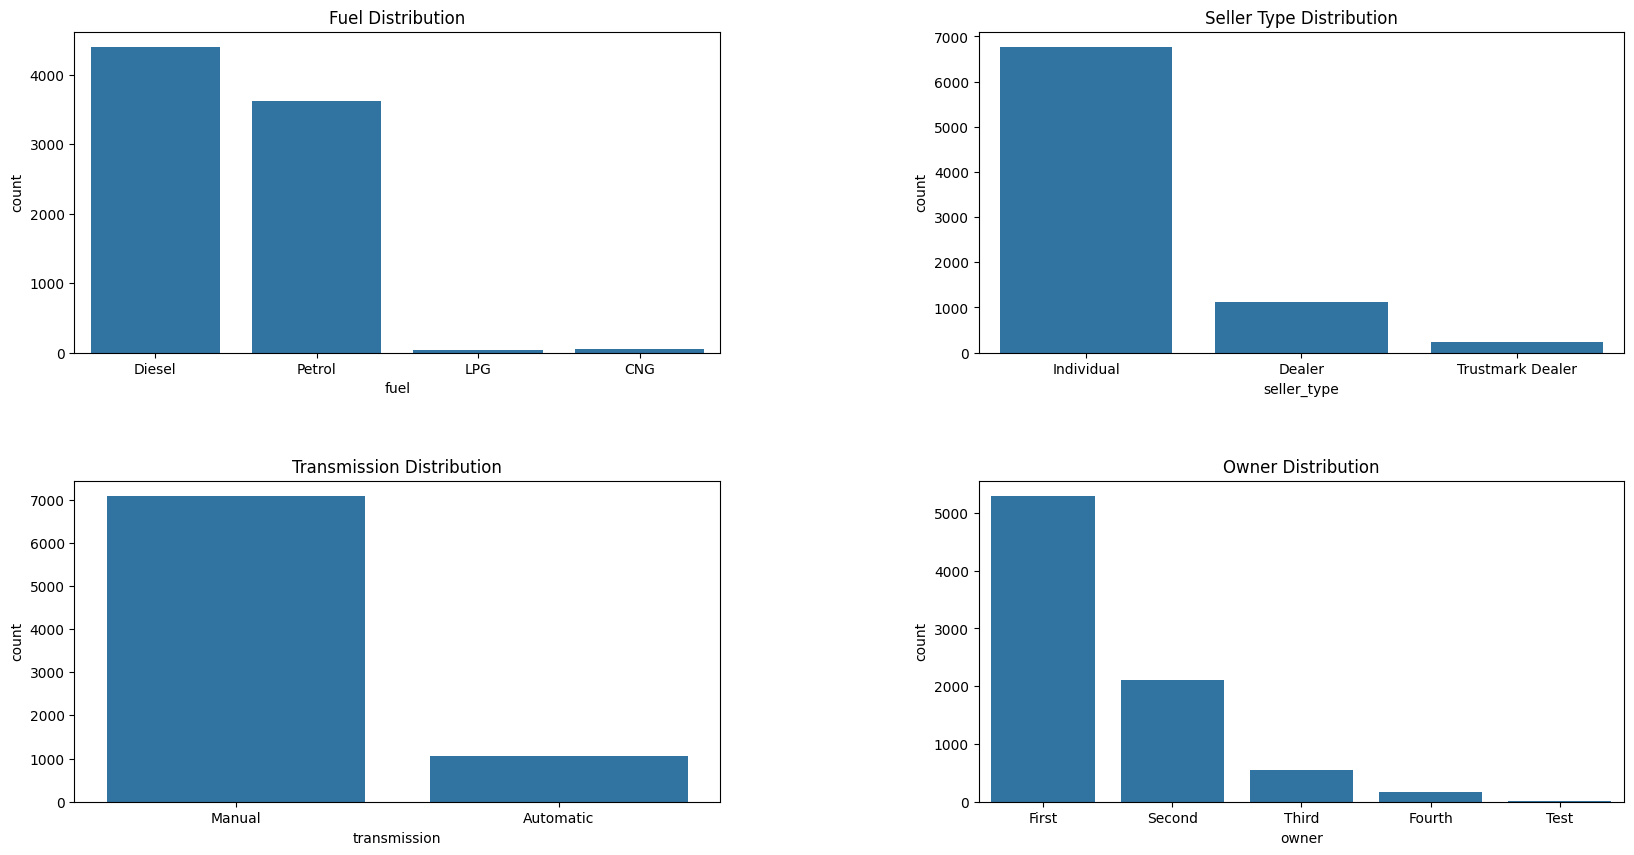

In [16]:
plt.figure(figsize=(20, 10))  # Taller height to accommodate horizontal bars

# First plot: Fuel distribution
plt.subplot(2, 2, 1)
sns.countplot(x=preprocessed_df['fuel']) 
plt.title('Fuel Distribution')

# Second plot: Seller Type distribution
plt.subplot(2, 2, 2)
sns.countplot(x=preprocessed_df['seller_type']) 
plt.title('Seller Type Distribution')

# Third plot: Transmission distribution
plt.subplot(2, 2, 3)
sns.countplot(x=preprocessed_df['transmission'])  
plt.title('Transmission Distribution')

# Fourth plot: Owner distribution
plt.subplot(2, 2, 4)
sns.countplot(x=preprocessed_df['owner'].apply(lambda x: x.split()[0]))
plt.title('Owner Distribution')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace= 0.4)  
plt.show()

Fuel type preprocessing

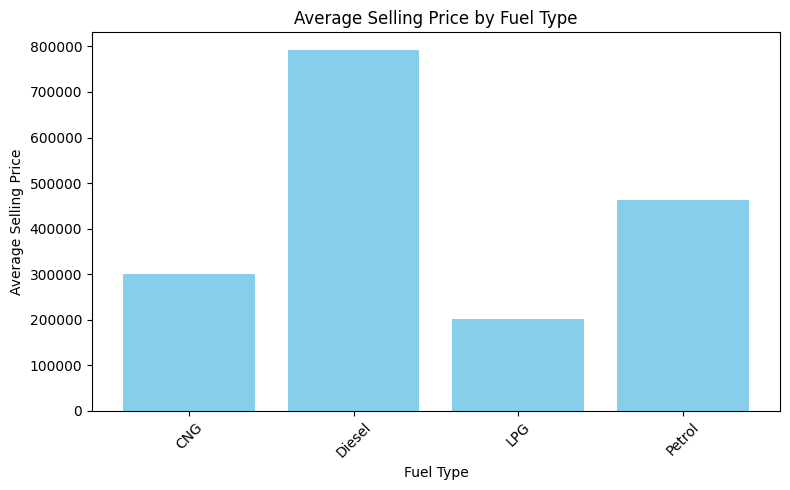

In [17]:
average_price = preprocessed_df.groupby('fuel')['selling_price'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(average_price['fuel'], average_price['selling_price'], color='skyblue')
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [18]:
print(preprocessed_df['fuel'].value_counts())

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64


In [19]:
#seeing that cng and lpg arent as popular as diesel and petrol, ill combine them
#this is done by weighted change
total_sample = preprocessed_df.shape[0]
petrol_counts = preprocessed_df['fuel'].value_counts()['Petrol']
diesel_counts = preprocessed_df['fuel'].value_counts()['Diesel']
cng_counts = preprocessed_df['fuel'].value_counts()['CNG']
lpg_counts = preprocessed_df['fuel'].value_counts()['LPG']

petrol_ratio = petrol_counts / total_sample
diesel_ratio = diesel_counts / total_sample

total_ratio = petrol_ratio + diesel_ratio
petrol_prob = petrol_ratio / total_ratio
diesel_prob = diesel_ratio / total_ratio

# Ensure the probabilities sum to 1
print("Petrol Probability: ", petrol_prob)
print("Diesel Probability: ", diesel_prob)

preprocessed_df['fuel'] = preprocessed_df['fuel'].apply(lambda x: np.random.choice(['Petrol', 'Diesel'], p=[petrol_prob, diesel_prob]) if x in ['LPG', 'CNG'] else x)

#  Verify the changes
print(preprocessed_df['fuel'].value_counts())

#original value
#Diesel    4402
#Petrol    3631
#CNG         57
#LPG         38

Petrol Probability:  0.4520104568654301
Diesel Probability:  0.5479895431345699
fuel
Diesel    4455
Petrol    3673
Name: count, dtype: int64


Seller type preprocessing

C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\2311288109.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=average_seller_type, palette='viridis')


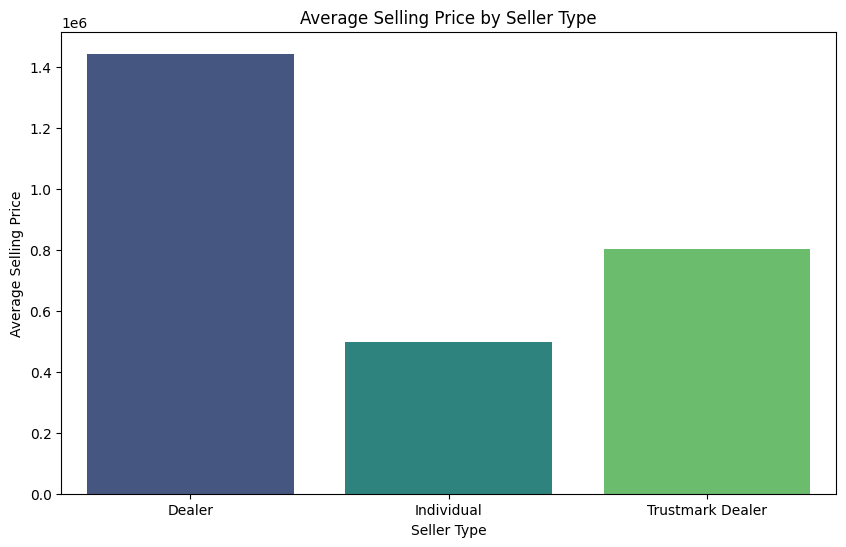

In [20]:
average_seller_type = preprocessed_df.groupby('seller_type')['selling_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='seller_type', y='selling_price', data=average_seller_type, palette='viridis')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\2369205375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='km_driven', data=average_km_seller_type, palette='viridis')


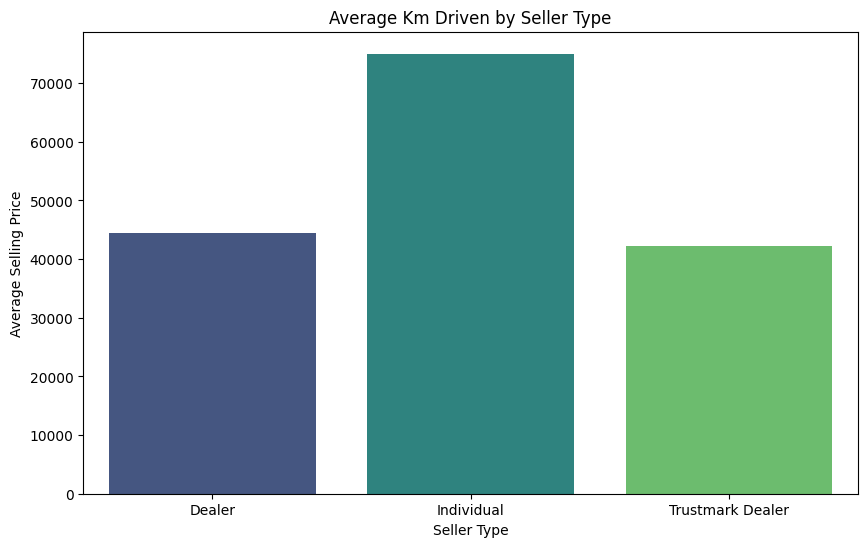

In [21]:
average_km_seller_type = preprocessed_df.groupby('seller_type')['km_driven'].mean().reset_index()


#checking if trustmark dealers have lower average km driven
plt.figure(figsize=(10, 6))
sns.barplot(x='seller_type', y='km_driven', data=average_km_seller_type, palette='viridis')
plt.title('Average Km Driven by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

In [22]:
print(preprocessed_df['seller_type'].value_counts())

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64


In [23]:
#considering that trustmark dealer is a dealer, ill combine them
#theres not really any dataset values that display higher quality vehicles
#hence i will combine them
preprocessed_df['seller_type'] = preprocessed_df['seller_type'].replace({
    'Trustmark Dealer': 'Dealer'
})

print(preprocessed_df['seller_type'].value_counts())

seller_type
Individual    6766
Dealer        1362
Name: count, dtype: int64


In [24]:
print(preprocessed_df['owner'].value_counts())

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64


C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\1327171138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='selling_price', data=average_owner_seller_type, palette='viridis')


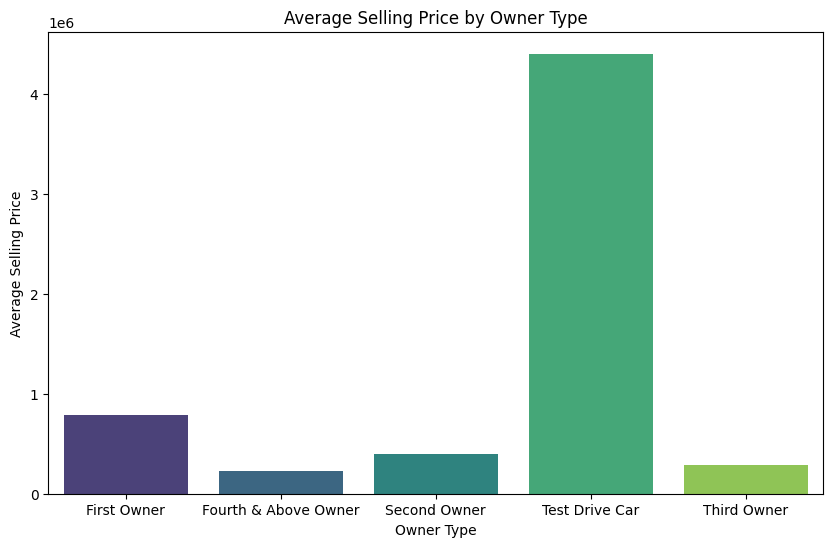

In [25]:
average_owner_seller_type = preprocessed_df.groupby('owner')['selling_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='owner', y='selling_price', data=average_owner_seller_type, palette='viridis')
plt.title('Average Selling Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Average Selling Price')
plt.show()

In [26]:
#seeing that test drive cars have 5 data samples and high the highest average selling price, i will combine them into first owners
preprocessed_df['owner'] = preprocessed_df['owner'].replace({
    'Test Drive Car': 'First Owner'
})

C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\2112862919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='selling_price', data=average_owner_seller_type,


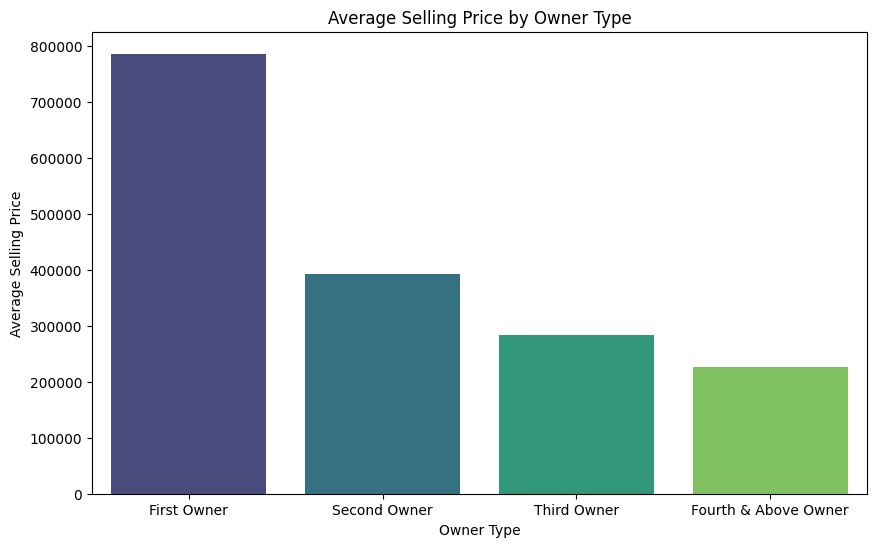

In [27]:
average_owner_seller_type = preprocessed_df.groupby('owner')['selling_price'].mean().reset_index()

owner_order = ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']

plt.figure(figsize=(10, 6))
sns.barplot(x='owner', y='selling_price', data=average_owner_seller_type, 
            palette='viridis', order=owner_order)
plt.title('Average Selling Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Average Selling Price')
plt.show()

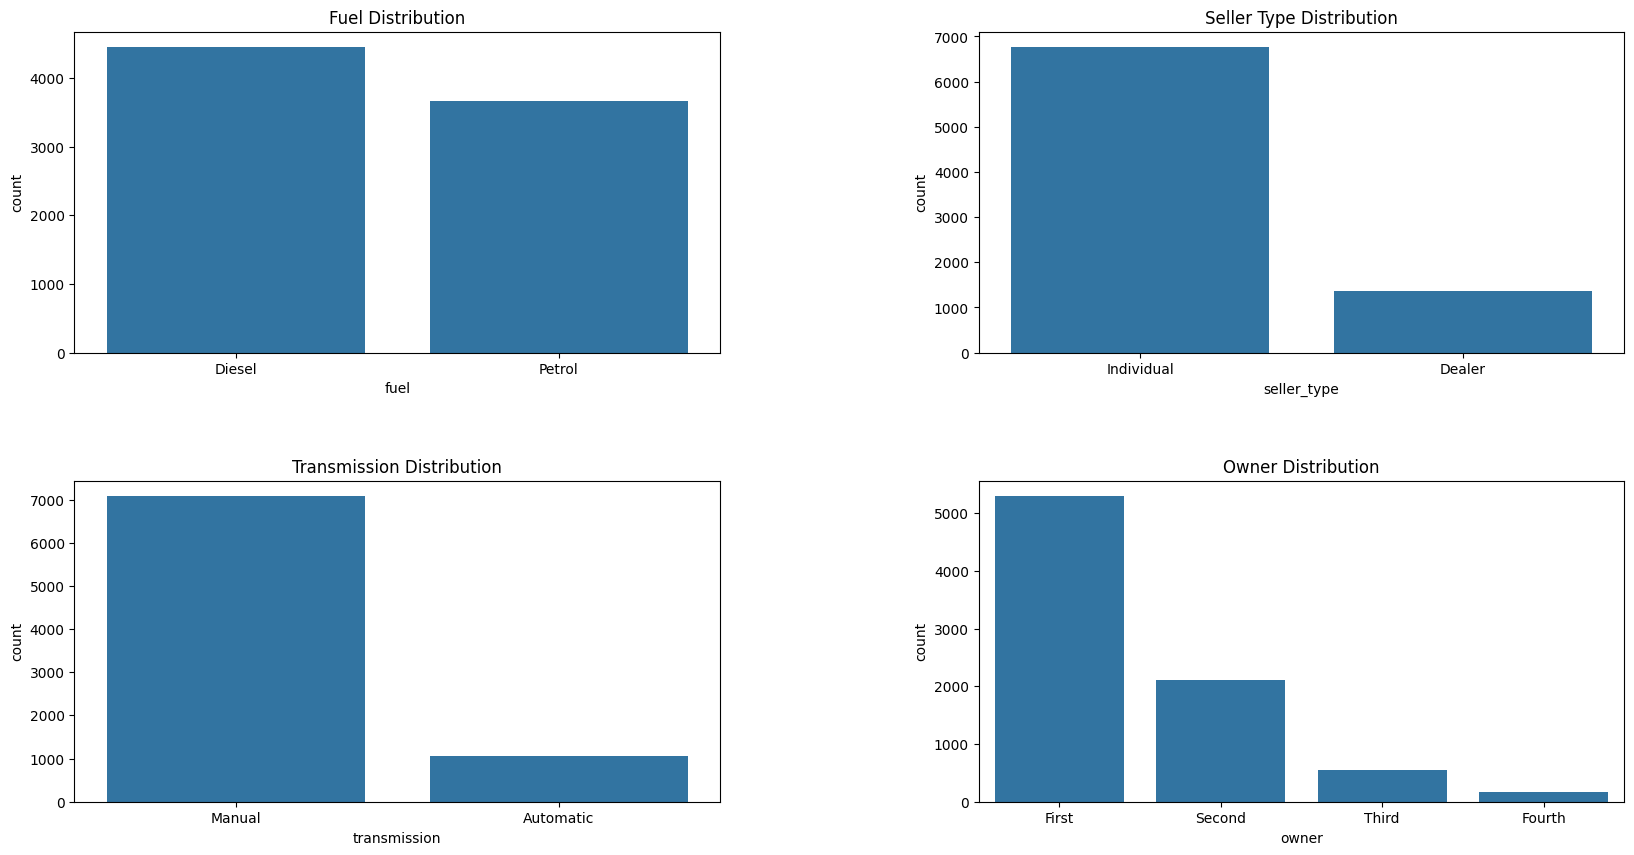

In [28]:
plt.figure(figsize=(20, 10))  # Taller height to accommodate horizontal bars

# First plot: Fuel distribution
plt.subplot(2, 2, 1)
sns.countplot(x=preprocessed_df['fuel']) 
plt.title('Fuel Distribution')

# Second plot: Seller Type distribution
plt.subplot(2, 2, 2)
sns.countplot(x=preprocessed_df['seller_type']) 
plt.title('Seller Type Distribution')

# Third plot: Transmission distribution
plt.subplot(2, 2, 3)
sns.countplot(x=preprocessed_df['transmission'])  
plt.title('Transmission Distribution')

# Fourth plot: Owner distribution
plt.subplot(2, 2, 4)
sns.countplot(x=preprocessed_df['owner'].apply(lambda x: x.split()[0]))
plt.title('Owner Distribution')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace= 0.4)  
plt.show()

In [29]:
preprocessed_df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
dtype: object

In [30]:
print("Fuel: ", preprocessed_df['fuel'].unique())
print("Seller Type: ", preprocessed_df['seller_type'].unique())
print("Transmission: ", preprocessed_df['transmission'].unique())
print("Owner: ", preprocessed_df['owner'].unique())

Fuel:  ['Diesel' 'Petrol']
Seller Type:  ['Individual' 'Dealer']
Transmission:  ['Manual' 'Automatic']
Owner:  ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner']


In [31]:
print(preprocessed_df['name'].unique())

['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']


In [32]:
#assuming the first word is the brand
preprocessed_df['brands'] = preprocessed_df['name'].str.split().str[0]

print(preprocessed_df[['name', 'brands']].head())

                           name   brands
0        Maruti Swift Dzire VDI   Maruti
1  Skoda Rapid 1.5 TDI Ambition    Skoda
2      Honda City 2017-2020 EXi    Honda
3     Hyundai i20 Sportz Diesel  Hyundai
4        Maruti Swift VXI BSIII   Maruti


In [33]:
preprocessed_df['brands'].value_counts()

brands
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [34]:
print(preprocessed_df['brands'].unique())

['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


In [35]:
brand_counts = preprocessed_df['brands'].value_counts()

threshold = preprocessed_df.shape[0] * 0.01
print("Threshold: ", threshold)

low_frequency_brands = brand_counts[brand_counts < threshold].index

preprocessed_df['brands'] = preprocessed_df['brands'].replace(low_frequency_brands, 'Other')

print(preprocessed_df['brands'].value_counts())


Threshold:  81.28
brands
Maruti        2448
Hyundai       1415
Mahindra       772
Tata           734
Other          538
Toyota         488
Honda          467
Ford           397
Chevrolet      230
Renault        228
Volkswagen     186
BMW            120
Skoda          105
Name: count, dtype: int64


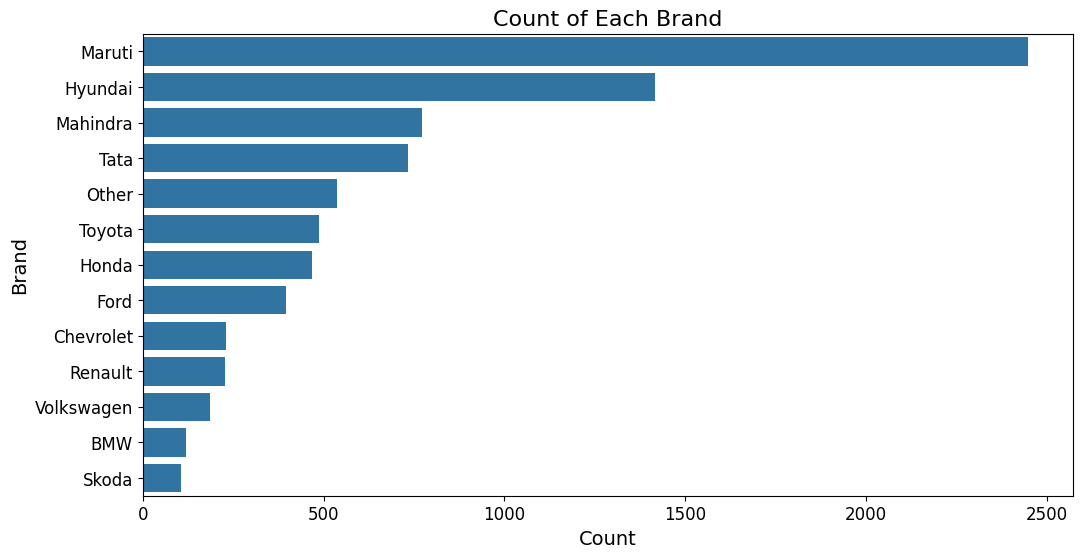

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(y='brands', data=preprocessed_df, order=preprocessed_df['brands'].value_counts().index)
plt.title('Count of Each Brand', fontsize=16)  # Adjust title font size
plt.xlabel('Count', fontsize=14)  # Adjust x-axis label font size
plt.ylabel('Brand', fontsize=14)  # Adjust y-axis label font size

# Adjust the tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Preprocess Halfway - Currently Encoding with binary method

In [37]:
#ill name it bool_preprocessed_df cause most objects are encoded into boolean
#another method will be implemented later
bool_preprocessed_df = deepcopy(preprocessed_df)

bool_preprocessed_df['fuel'] = bool_preprocessed_df['fuel'].replace({'Diesel': 0, 'Petrol': 1})
bool_preprocessed_df['seller_type'] = bool_preprocessed_df['seller_type'].replace({'Individual': 0, 'Dealer': 1})
bool_preprocessed_df['owner'] = bool_preprocessed_df['owner'].replace({'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3})
bool_preprocessed_df['transmission'] = bool_preprocessed_df['transmission'].replace({'Manual': 0, 'Automatic': 1})
encoder = LabelEncoder()
bool_preprocessed_df['brands'] = encoder.fit_transform(bool_preprocessed_df['brands'])



C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\2096104505.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bool_preprocessed_df['fuel'] = bool_preprocessed_df['fuel'].replace({'Diesel': 0, 'Petrol': 1})
C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\2096104505.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bool_preprocessed_df['seller_type'] = bool_preprocessed_df['seller_type'].replace({'Individual': 0, 'Dealer': 1})
C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\2096104505.py:7: FutureWarning: Downca

In [38]:
brand_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(brand_mapping)

{'BMW': np.int64(0), 'Chevrolet': np.int64(1), 'Ford': np.int64(2), 'Honda': np.int64(3), 'Hyundai': np.int64(4), 'Mahindra': np.int64(5), 'Maruti': np.int64(6), 'Other': np.int64(7), 'Renault': np.int64(8), 'Skoda': np.int64(9), 'Tata': np.int64(10), 'Toyota': np.int64(11), 'Volkswagen': np.int64(12)}


In [39]:
print(bool_preprocessed_df.dtypes)

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                    int64
seller_type             int64
transmission            int64
owner                   int64
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
brands                  int64
dtype: object


In [40]:
bool_preprocessed_df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
brands                0
dtype: int64

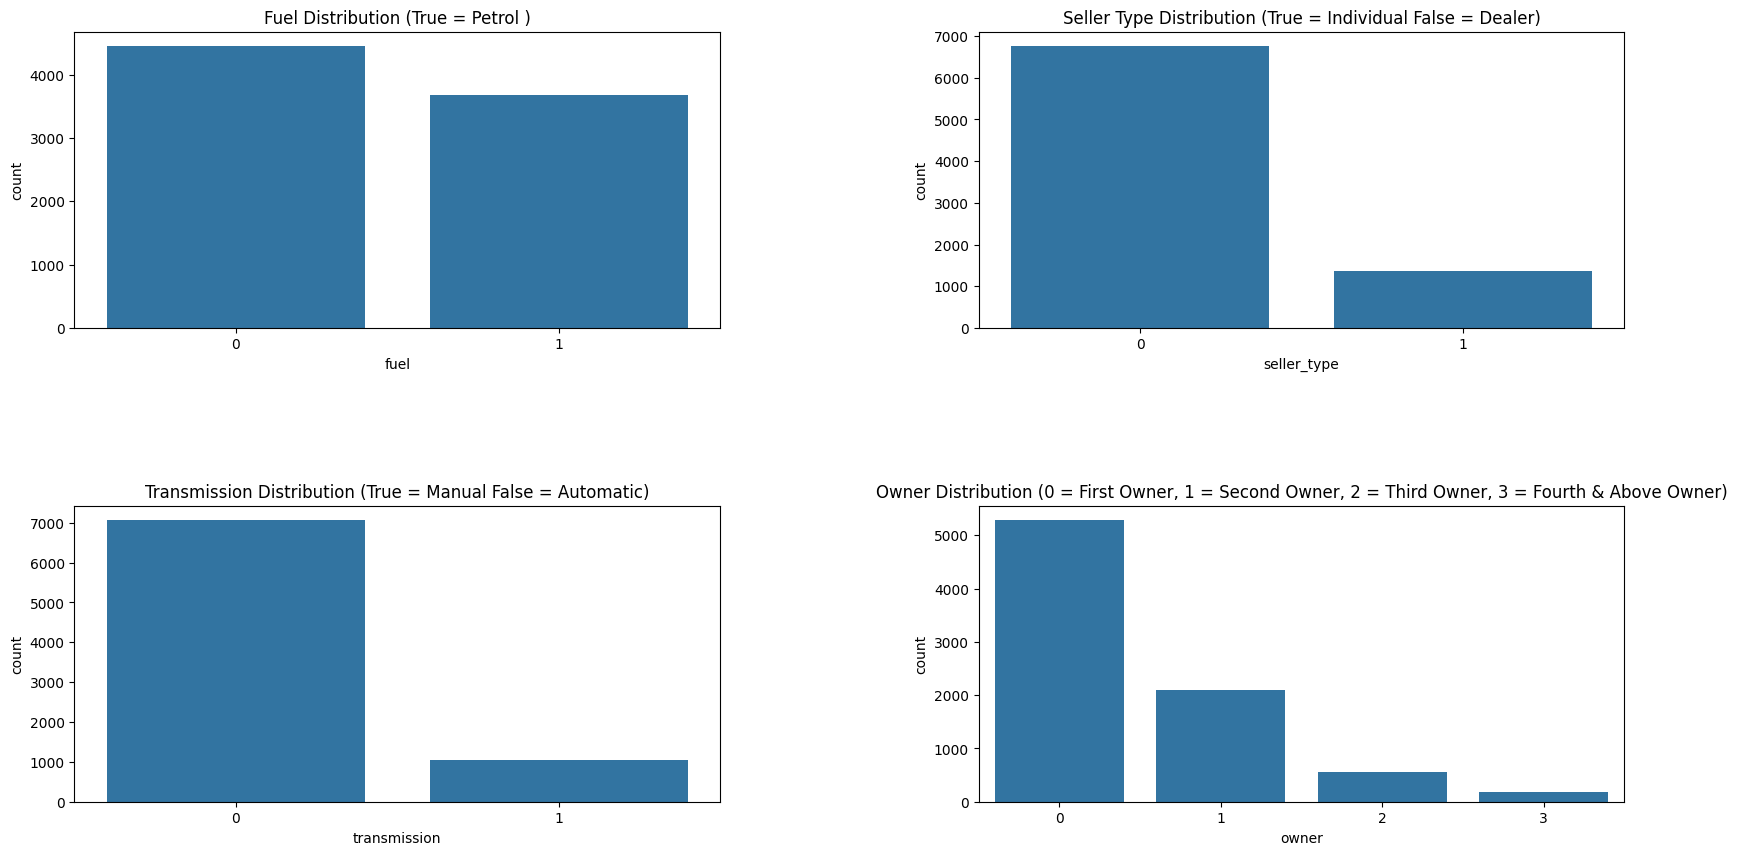

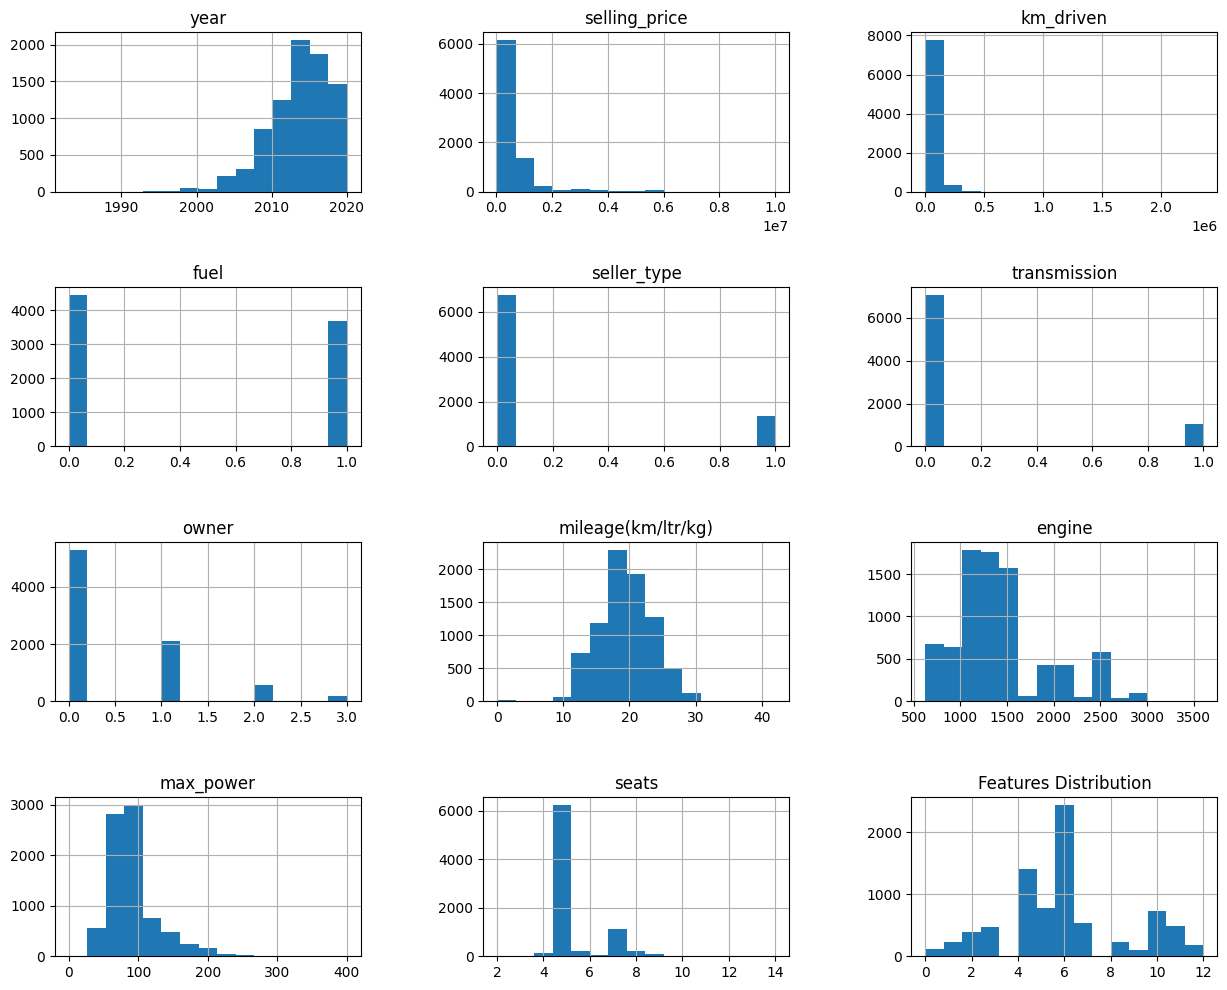

In [41]:
plt.figure(figsize=(20, 10))  # Taller height to accommodate horizontal bars

# First plot: Fuel distribution
plt.subplot(2, 2, 1)
sns.countplot(x=bool_preprocessed_df['fuel']) 
plt.title('Fuel Distribution (True = Petrol )')

# Second plot: Seller Type distribution
plt.subplot(2, 2, 2)
sns.countplot(x=bool_preprocessed_df['seller_type']) 
plt.title('Seller Type Distribution (True = Individual False = Dealer)')

# Third plot: Transmission distribution
plt.subplot(2, 2, 3)
sns.countplot(x=bool_preprocessed_df['transmission'])  
plt.title('Transmission Distribution (True = Manual False = Automatic)')
plt.subplots_adjust(wspace=0.4, hspace= 0.6)  

plt.subplot(2, 2, 4)
sns.countplot(x=bool_preprocessed_df['owner'])  
plt.title('Owner Distribution (0 = First Owner, 1 = Second Owner, 2 = Third Owner, 3 = Fourth & Above Owner)')
plt.subplots_adjust(wspace=0.4, hspace= 0.6)  

bool_preprocessed_df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace= 0.6)  
plt.show()

Preprocessing done for binary encoding

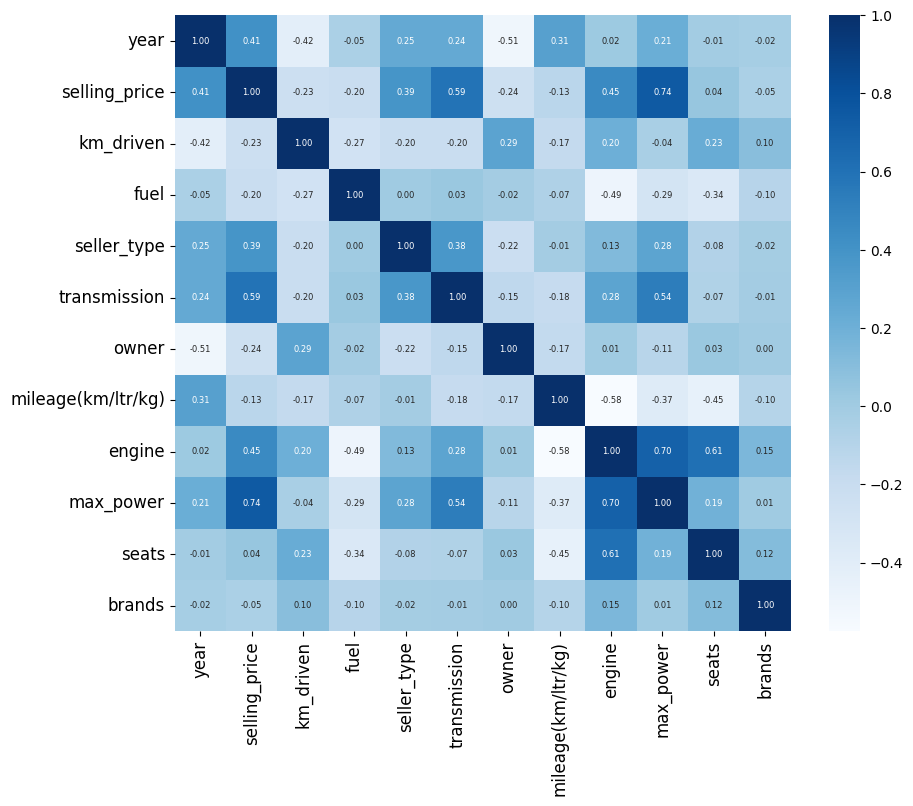

In [42]:
bool_df_for_corr = bool_preprocessed_df.drop(['name'], axis=1)

bool_corr_matrix = bool_df_for_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(bool_corr_matrix, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':6}, cmap='Blues')
plt.xticks(fontsize=12)  # Adjust x-axis label font size
plt.yticks(fontsize=12)  # Adjust y-axis label font size
plt.show()

<Axes: >

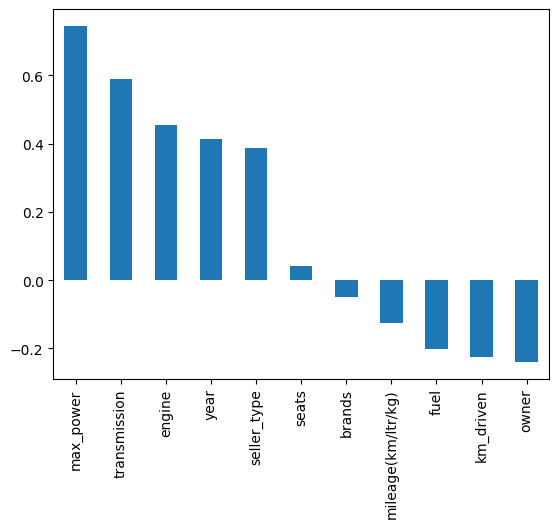

In [43]:
bool_corr_matrix['selling_price'].drop('selling_price').sort_values(ascending = False).plot(kind = 'bar')

In [44]:
X = bool_preprocessed_df.drop(['selling_price', 'name'], axis=1)

y = bool_preprocessed_df['selling_price']

#dataset split to 80 - 20 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.metrics import mean_absolute_error, r2_score

bool_RandomForest_model = RandomForestRegressor()
bool_RandomForest_model.fit(X_train, y_train)

bool_Random_pred = bool_RandomForest_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
bool_Random_mae = mean_absolute_error(y_test, bool_Random_pred)
print(f"Mean Absolute Error: {bool_Random_mae}")

# Calculate R-squared
bool_Random_r2 = r2_score(y_test, bool_Random_pred)
print(f"R-squared: {bool_Random_r2}")

bool_Random_mae_percentage = (bool_Random_mae / y.mean()) * 100
print(f"MAE as percentage of average selling price: {bool_Random_mae_percentage:.2f}%")

Mean Absolute Error: 68890.8665911068
R-squared: 0.9697294415550621
MAE as percentage of average selling price: 10.79%


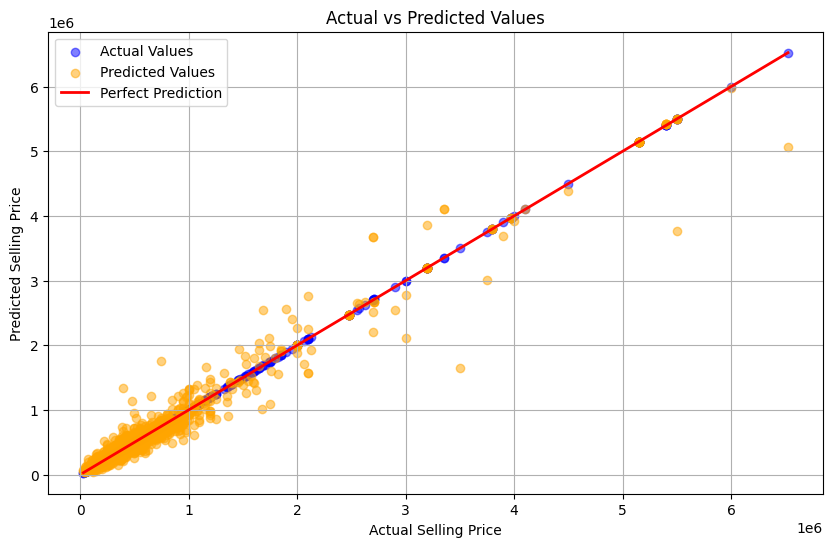

In [46]:
import matplotlib.pyplot as plt

# Predict on the test set
Random_y_pred = bool_RandomForest_model.predict(X_test)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual Values')
plt.scatter(y_test, Random_y_pred, color='orange', alpha=0.5, label='Predicted Values')

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [47]:
bool_DecisionTree_model = DecisionTreeRegressor()
bool_DecisionTree_model.fit(X_train, y_train)

bool_Decision_pred = bool_DecisionTree_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
bool_decision_mae = mean_absolute_error(y_test, bool_Decision_pred)
print(f"Mean Absolute Error: {bool_decision_mae}")

# Calculate R-squared
bool_decision_r2 = r2_score(y_test, bool_Decision_pred)
print(f"R-squared: {bool_decision_r2}")

bool_decision_mae_percentage = (bool_decision_mae / y.mean()) * 100
print(f"MAE as percentage of average selling price: {bool_decision_mae_percentage:.2f}%")

Mean Absolute Error: 92579.91081228119
R-squared: 0.8815226574927187
MAE as percentage of average selling price: 14.50%


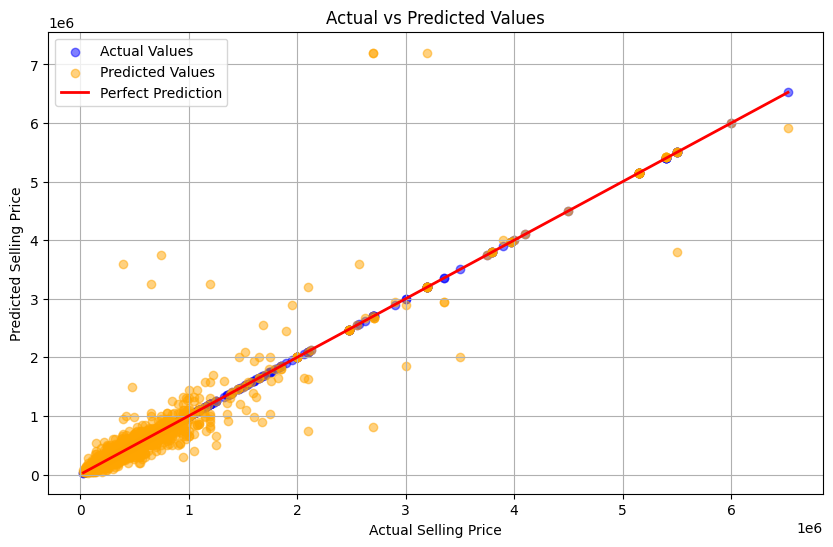

In [48]:
import matplotlib.pyplot as plt

# Predict on the test set
Decision_y_pred = bool_DecisionTree_model.predict(X_test)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual Values')
plt.scatter(y_test, Decision_y_pred, color='orange', alpha=0.5, label='Predicted Values')

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [49]:
decision_tree_importances = pd.DataFrame({
    'Feature': X.columns,
    'DecisionTree_Importance': bool_DecisionTree_model.feature_importances_
})

random_forest_importances = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest_Importance': bool_RandomForest_model.feature_importances_
})

combined_importances = pd.merge(decision_tree_importances, random_forest_importances, on='Feature')

combined_importances = combined_importances.sort_values(by='DecisionTree_Importance', ascending=False)

print(combined_importances)

               Feature  DecisionTree_Importance  RandomForest_Importance
8            max_power                 0.729559                 0.716558
0                 year                 0.198119                 0.186835
1            km_driven                 0.020205                 0.034452
6   mileage(km/ltr/kg)                 0.013584                 0.016537
3          seller_type                 0.011033                 0.006221
10              brands                 0.009482                 0.010328
7               engine                 0.009389                 0.017451
2                 fuel                 0.003984                 0.004110
5                owner                 0.002635                 0.001521
9                seats                 0.001461                 0.004018
4         transmission                 0.000548                 0.001969


In [50]:
print(X.columns)
#get the order of the columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'brands'],
      dtype='object')


In [51]:
print(brand_mapping)

{'BMW': np.int64(0), 'Chevrolet': np.int64(1), 'Ford': np.int64(2), 'Honda': np.int64(3), 'Hyundai': np.int64(4), 'Mahindra': np.int64(5), 'Maruti': np.int64(6), 'Other': np.int64(7), 'Renault': np.int64(8), 'Skoda': np.int64(9), 'Tata': np.int64(10), 'Toyota': np.int64(11), 'Volkswagen': np.int64(12)}


In [52]:
new_data = pd.DataFrame({
    'year': [2016],
    'km_driven': [100000],
    'fuel': [0],  # diesel
    'seller_type': [0],  # Individual
    'transmission': [0],  # Manual Transmission
    'owner': [0],  # first
    'mileage(km/ltr/kg)': [22.54],
    'engine': [1396.0],
    'max_power': [88.73],
    'seats': [5.0],
    'brands': [4]  # Maruti
})

#0 is diesel, 1 is petrol
#0 is individual, 1 is dealer
#0 is first owner, 1 is second owner, 2 is third owner, 3 is fourth and above owner
#0 is manual, 1 is automatic

# Predict the selling price for the new data
Decision_predicted_price = bool_DecisionTree_model.predict(new_data)
Random_predicted_price = bool_RandomForest_model.predict(new_data)

print(f"Decision Predicted Selling Price: {Decision_predicted_price[0]}")
print(f"Random Predicted Selling Price: {Random_predicted_price[0]}")

#target price : 680000

Decision Predicted Selling Price: 700000.0
Random Predicted Selling Price: 650690.0


Attempt to enchance with hot-encoding

In [53]:
columns_to_encode = ['brands', 'fuel', 'seller_type', 'owner', 'transmission']

hot_encoding_preprocessed_df = pd.get_dummies(preprocessed_df, columns=columns_to_encode, drop_first=True)

In [54]:
print(hot_encoding_preprocessed_df.dtypes)

name                           object
year                            int64
selling_price                   int64
km_driven                       int64
mileage(km/ltr/kg)            float64
engine                        float64
max_power                     float64
seats                         float64
brands_Chevrolet                 bool
brands_Ford                      bool
brands_Honda                     bool
brands_Hyundai                   bool
brands_Mahindra                  bool
brands_Maruti                    bool
brands_Other                     bool
brands_Renault                   bool
brands_Skoda                     bool
brands_Tata                      bool
brands_Toyota                    bool
brands_Volkswagen                bool
fuel_Petrol                      bool
seller_type_Individual           bool
owner_Fourth & Above Owner       bool
owner_Second Owner               bool
owner_Third Owner                bool
transmission_Manual              bool
dtype: objec

In [55]:
hot_encoding_preprocessed_df.isnull().sum()

name                          0
year                          0
selling_price                 0
km_driven                     0
mileage(km/ltr/kg)            0
engine                        0
max_power                     0
seats                         0
brands_Chevrolet              0
brands_Ford                   0
brands_Honda                  0
brands_Hyundai                0
brands_Mahindra               0
brands_Maruti                 0
brands_Other                  0
brands_Renault                0
brands_Skoda                  0
brands_Tata                   0
brands_Toyota                 0
brands_Volkswagen             0
fuel_Petrol                   0
seller_type_Individual        0
owner_Fourth & Above Owner    0
owner_Second Owner            0
owner_Third Owner             0
transmission_Manual           0
dtype: int64

<Figure size 2000x1000 with 0 Axes>

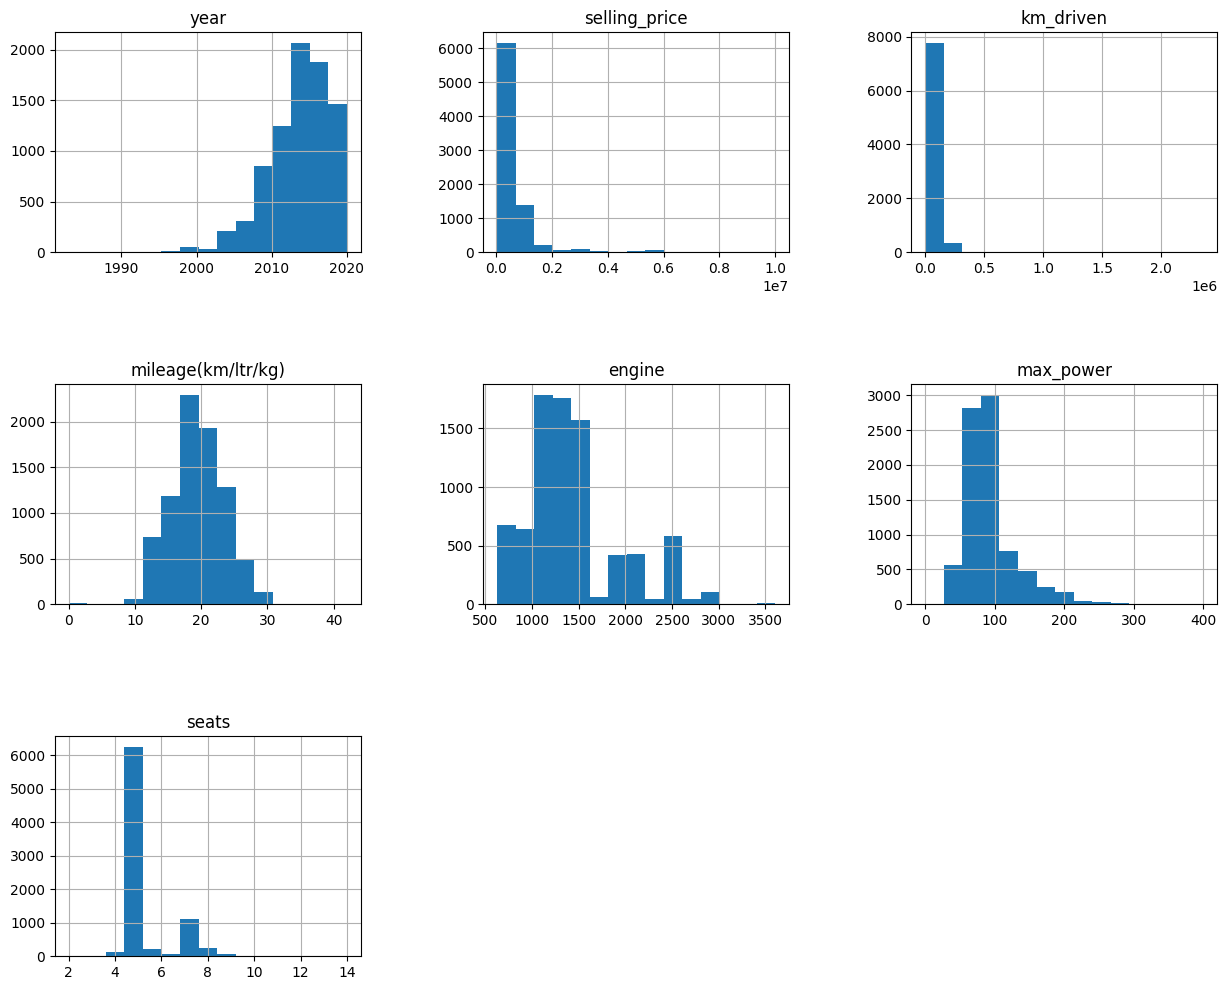

In [56]:
plt.figure(figsize=(20, 10))  # Taller height to accommodate horizontal bars


hot_encoding_preprocessed_df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace= 0.6)  
plt.show()

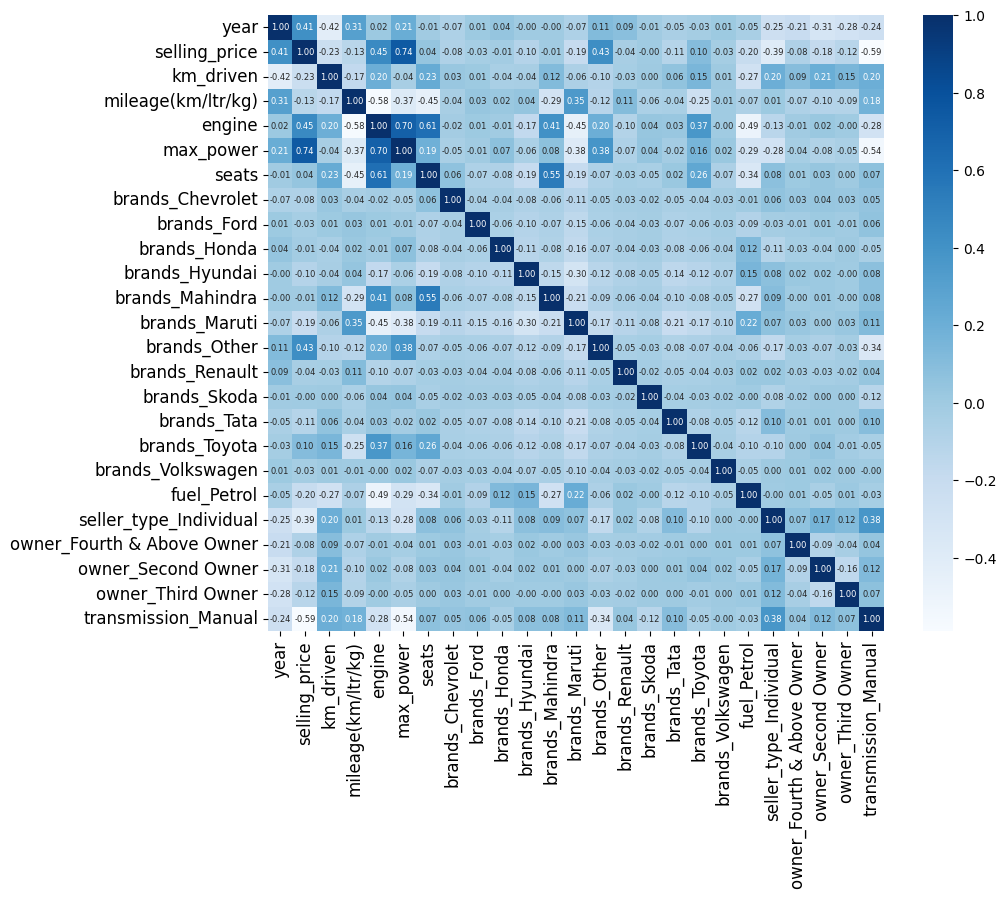

In [57]:
hot_encoding_df_for_corr = hot_encoding_preprocessed_df.drop(['name'], axis=1)

hot_encoding_corr_matrix = hot_encoding_df_for_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(hot_encoding_corr_matrix, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':6}, cmap='Blues')
plt.xticks(fontsize=12)  # Adjust x-axis label font size
plt.yticks(fontsize=12)  # Adjust y-axis label font size
plt.show()

<Axes: >

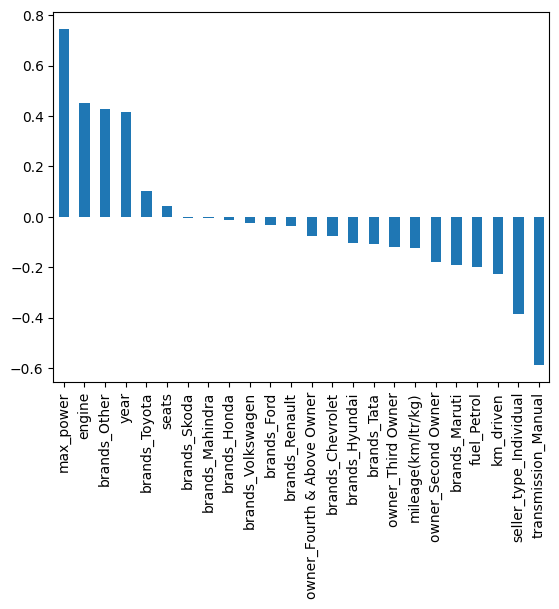

In [58]:
hot_encoding_corr_matrix['selling_price'].drop('selling_price').sort_values(ascending = False).plot(kind = 'bar')

In [59]:
X = hot_encoding_preprocessed_df.drop(['selling_price', 'name'], axis=1)

y = hot_encoding_preprocessed_df['selling_price']

#dataset split to 80 - 20 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.metrics import mean_absolute_error, r2_score

hot_encoding_RandomForest_model = RandomForestRegressor()
hot_encoding_RandomForest_model.fit(X_train, y_train)

hot_encoding_Random_pred = hot_encoding_RandomForest_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
hot_encoding_Random_mae = mean_absolute_error(y_test, hot_encoding_Random_pred)
print(f"Mean Absolute Error: {hot_encoding_Random_mae}")

# Calculate R-squared
hot_encoding_Random_r2 = r2_score(y_test, hot_encoding_Random_pred)
print(f"R-squared: {hot_encoding_Random_r2}")

hot_encoding_Random_mae_percentage = (hot_encoding_Random_mae / y.mean()) * 100
print(f"MAE as percentage of average selling price: {hot_encoding_Random_mae_percentage:.2f}%")

Mean Absolute Error: 70327.46655877022
R-squared: 0.9658208186531599
MAE as percentage of average selling price: 11.02%


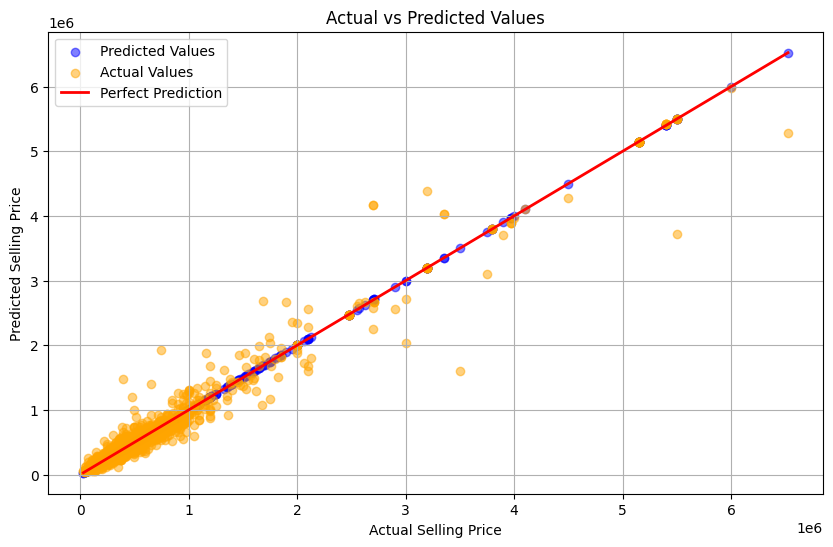

In [61]:
import matplotlib.pyplot as plt

# Predict on the test set
Random_y_pred = hot_encoding_RandomForest_model.predict(X_test)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Predicted Values')
plt.scatter(y_test, Random_y_pred, color='orange', alpha=0.5, label='Actual Values')

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [62]:
hot_encoding_DecisionTree_model = DecisionTreeRegressor()
hot_encoding_DecisionTree_model.fit(X_train, y_train)

hot_encoding_Decision_pred = hot_encoding_DecisionTree_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
hot_encoding_decision_mae = mean_absolute_error(y_test, hot_encoding_Decision_pred)
print(f"Mean Absolute Error: {hot_encoding_decision_mae}")

# Calculate R-squared
hot_encoding_decision_r2 = r2_score(y_test, hot_encoding_Decision_pred)
print(f"R-squared: {hot_encoding_decision_r2}")

hot_encoding_decision_mae_percentage = (hot_encoding_decision_mae / y.mean()) * 100
print(f"MAE as percentage of average selling price: {hot_encoding_decision_mae_percentage:.2f}%")

Mean Absolute Error: 89211.28811855425
R-squared: 0.891740546176226
MAE as percentage of average selling price: 13.98%


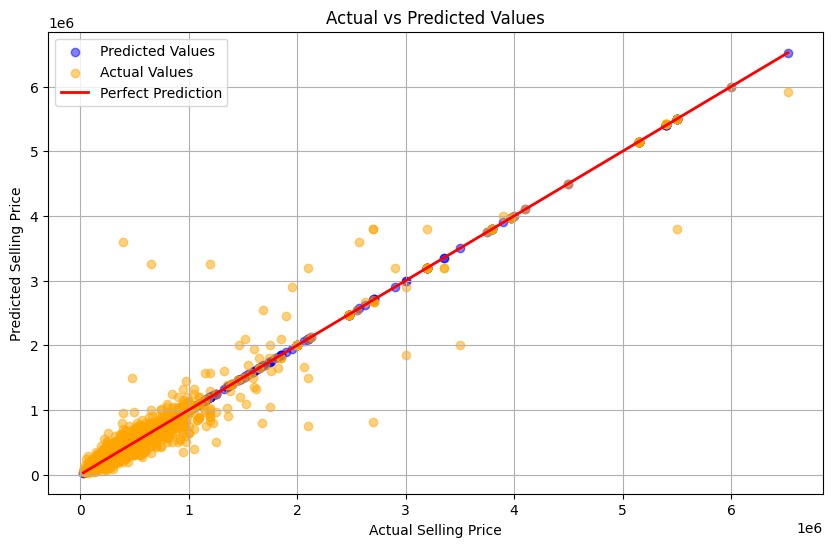

In [77]:
import matplotlib.pyplot as plt

# Predict on the test set
Random_y_pred = hot_encoding_DecisionTree_model.predict(X_test)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Predicted Values')
plt.scatter(y_test, Random_y_pred, color='orange', alpha=0.5, label='Actual Values')

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [79]:
hot_encoding_decision_tree_importances = pd.DataFrame({
    'Feature': X.columns,
    'DecisionTree_Importance': hot_encoding_DecisionTree_model.feature_importances_
})

hot_encoding_random_forest_importances = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest_Importance': hot_encoding_RandomForest_model.feature_importances_
})

combined_importances = pd.merge(hot_encoding_decision_tree_importances, hot_encoding_random_forest_importances, on='Feature')

combined_importances = combined_importances.sort_values(by='DecisionTree_Importance', ascending=False)

print(combined_importances)



                       Feature  DecisionTree_Importance  \
7                    max_power                 0.725573   
0                         year                 0.198742   
1                    km_driven                 0.020101   
5           mileage(km/ltr/kg)                 0.018938   
3                  seller_type                 0.010736   
6                       engine                 0.007140   
15                brands_Other                 0.003644   
2                         fuel                 0.003398   
8                        seats                 0.003147   
19               brands_Toyota                 0.002740   
22          owner_Second Owner                 0.001821   
18                 brands_Tata                 0.001503   
4                 transmission                 0.000580   
20           brands_Volkswagen                 0.000310   
13             brands_Mahindra                 0.000289   
9             brands_Chevrolet                 0.000225 

In [65]:
print(X.columns)

Index(['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'brands_Chevrolet', 'brands_Ford', 'brands_Honda',
       'brands_Hyundai', 'brands_Mahindra', 'brands_Maruti', 'brands_Other',
       'brands_Renault', 'brands_Skoda', 'brands_Tata', 'brands_Toyota',
       'brands_Volkswagen', 'fuel_Petrol', 'seller_type_Individual',
       'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner',
       'transmission_Manual'],
      dtype='object')


In [66]:

print(f"Hot Encoding Decision Mean Absolute Error: {hot_encoding_decision_mae}")
print(f"Hot Encoding DecisionR-squared: {hot_encoding_decision_r2}")
print(f"Hot Encoding Decision MAE as percentage of average selling price: {hot_encoding_decision_mae_percentage:.2f}%")

print(f"Hot Encoding Random Mean Absolute Error: {hot_encoding_Random_mae}")
print(f"Hot Encoding Random R-squared: {hot_encoding_Random_r2}")
print(f"Hot Encoding Random MAE as percentage of average selling price: {hot_encoding_Random_mae_percentage:.2f}%")

print(f"Bool Decision Mean Absolute Error: {bool_decision_mae}")
print(f"Bool Decision R-squared: {bool_decision_r2}")
print(f"Bool Decision MAE as percentage of average selling price: {bool_decision_mae_percentage:.2f}%")

print(f"Bool Random Mean Absolute Error: {bool_Random_mae}")
print(f"Bool Random R-squared: {bool_Random_r2}")
print(f"Bool Random MAE as percentage of average selling price: {bool_Random_mae_percentage:.2f}%")


Hot Encoding Decision Mean Absolute Error: 89211.28811855425
Hot Encoding DecisionR-squared: 0.891740546176226
Hot Encoding Decision MAE as percentage of average selling price: 13.98%
Hot Encoding Random Mean Absolute Error: 70327.46655877022
Hot Encoding Random R-squared: 0.9658208186531599
Hot Encoding Random MAE as percentage of average selling price: 11.02%
Bool Decision Mean Absolute Error: 92579.91081228119
Bool Decision R-squared: 0.8815226574927187
Bool Decision MAE as percentage of average selling price: 14.50%
Bool Random Mean Absolute Error: 68890.8665911068
Bool Random R-squared: 0.9697294415550621
Bool Random MAE as percentage of average selling price: 10.79%


In [67]:
print(X.columns)

Index(['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'brands_Chevrolet', 'brands_Ford', 'brands_Honda',
       'brands_Hyundai', 'brands_Mahindra', 'brands_Maruti', 'brands_Other',
       'brands_Renault', 'brands_Skoda', 'brands_Tata', 'brands_Toyota',
       'brands_Volkswagen', 'fuel_Petrol', 'seller_type_Individual',
       'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner',
       'transmission_Manual'],
      dtype='object')


In [68]:
new_data = pd.DataFrame({
    'year': [2016],
    'km_driven': [100000],
    'mileage(km/ltr/kg)': [22.54],
    'engine': [1396.0],
    'max_power': [88.73],
    'seats': [5.0],
    'brands_Chevrolet': [0],   # Not applicable
    'brands_Ford': [0],        # Not applicable
    'brands_Honda': [0],       # Not applicable
    'brands_Hyundai': [0],     # Not applicable
    'brands_Mahindra': [0],    # Not applicable
    'brands_Maruti': [1],       # Applicable
    'brands_Other': [0],       # Not applicable
    'brands_Renault': [0],     # Not applicable
    'brands_Skoda': [0],       # Not applicable
    'brands_Tata': [0],        # Not applicable
    'brands_Toyota': [0],      # Not applicable
    'brands_Volkswagen': [0],  # Not applicable
    'fuel_Petrol': [0],        # Diesel
    'seller_type_Individual': [1],  # Individual seller
    'owner_Fourth & Above Owner': [0],
    'owner_Second Owner': [0],
    'owner_Third Owner': [0],
    'transmission_Manual': [1],  # Manual transmission
})

#0 is diesel, 1 is petrol
#0 is individual, 1 is dealer
#0 is first owner, 1 is second owner, 2 is third owner, 3 is fourth and above owner
#0 is manual, 1 is automatic

# Predict the selling price for the new data
Decision_predicted_price = hot_encoding_RandomForest_model.predict(new_data)
#Random_predicted_price = bool_RandomForest_model.predict(new_data)

print(f"Decision Predicted Selling Price: {Decision_predicted_price[0]}")
#print(f"Random Predicted Selling Price: {Random_predicted_price[0]}")

#Decision Predicted Selling Price: 700000.0 (20000 off)
#Random Predicted Selling Price: 663120.0 (16880 off)

#target price : 680000
#Decision Predicted Selling Price: 664320.0 (15680 off)
#More accurate model



Decision Predicted Selling Price: 643180.0


In [69]:
columns_to_encode = ['brands', 'owner']

#assuming brands and owners are non ordinals
#ill use one hot encoding
#fuel, seller type and transmission are ordinals
#ill use label encoding

hot_encoding_preprocessed_df = pd.get_dummies(preprocessed_df, columns=columns_to_encode, drop_first=True)
hot_encoding_preprocessed_df['fuel'] = hot_encoding_preprocessed_df['fuel'].replace({'Diesel': 0, 'Petrol': 1})
hot_encoding_preprocessed_df['seller_type'] = hot_encoding_preprocessed_df['seller_type'].replace({'Individual': 0, 'Dealer': 1})
hot_encoding_preprocessed_df['transmission'] = hot_encoding_preprocessed_df['transmission'].replace({'Manual': 0, 'Automatic': 1})



C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\3898505688.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hot_encoding_preprocessed_df['fuel'] = hot_encoding_preprocessed_df['fuel'].replace({'Diesel': 0, 'Petrol': 1})
C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\3898505688.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hot_encoding_preprocessed_df['seller_type'] = hot_encoding_preprocessed_df['seller_type'].replace({'Individual': 0, 'Dealer': 1})
C:\Users\Devus Lee\AppData\Local\Temp\ipykernel_18716\38985

In [80]:
print(hot_encoding_preprocessed_df.dtypes)

name                           object
year                            int64
selling_price                   int64
km_driven                       int64
fuel                            int64
seller_type                     int64
transmission                    int64
mileage(km/ltr/kg)            float64
engine                        float64
max_power                     float64
seats                         float64
brands_Chevrolet                 bool
brands_Ford                      bool
brands_Honda                     bool
brands_Hyundai                   bool
brands_Mahindra                  bool
brands_Maruti                    bool
brands_Other                     bool
brands_Renault                   bool
brands_Skoda                     bool
brands_Tata                      bool
brands_Toyota                    bool
brands_Volkswagen                bool
owner_Fourth & Above Owner       bool
owner_Second Owner               bool
owner_Third Owner                bool
dtype: objec

In [81]:
hot_encoding_preprocessed_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage(km/ltr/kg),engine,max_power,...,brands_Maruti,brands_Other,brands_Renault,brands_Skoda,brands_Tata,brands_Toyota,brands_Volkswagen,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,23.40,1248.0,74.00,...,True,False,False,False,False,False,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,21.14,1498.0,103.52,...,False,False,False,True,False,False,False,False,True,False
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,17.70,1497.0,78.00,...,False,False,False,False,False,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,23.00,1396.0,90.00,...,False,False,False,False,False,False,False,False,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,16.10,1298.0,88.20,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,0,0,18.50,1197.0,82.85,...,False,False,False,False,False,False,False,False,False,False
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,0,0,16.80,1493.0,110.00,...,False,False,False,False,False,False,False,True,False,False
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,0,0,19.30,1248.0,73.90,...,True,False,False,False,False,False,False,False,False,False
8126,Tata Indigo CR4,2013,290000,25000,0,0,0,23.57,1396.0,70.00,...,False,False,False,False,True,False,False,False,False,False


In [87]:
X = hot_encoding_preprocessed_df.drop(['selling_price', 'name'], axis=1)

y = hot_encoding_preprocessed_df['selling_price']

#dataset split to 80 - 20 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
from sklearn.metrics import mean_absolute_error, r2_score

hot_encoding_RandomForest_model = RandomForestRegressor()
hot_encoding_RandomForest_model.fit(X_train, y_train)

hot_encoding_Random_pred = hot_encoding_RandomForest_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
hot_encoding_Random_mae = mean_absolute_error(y_test, hot_encoding_Random_pred)
print(f"Mean Absolute Error: {hot_encoding_Random_mae}")

# Calculate R-squared
hot_encoding_Random_r2 = r2_score(y_test, hot_encoding_Random_pred)
print(f"R-squared: {hot_encoding_Random_r2}")

hot_encoding_Random_mae_percentage = (hot_encoding_Random_mae / y.mean()) * 100
print(f"MAE as percentage of average selling price: {hot_encoding_Random_mae_percentage:.2f}%")

Mean Absolute Error: 70052.16430623403
R-squared: 0.9659825932519108
MAE as percentage of average selling price: 10.98%


In [102]:
from sklearn.metrics import mean_absolute_error, r2_score

hot_encoding_RandomForest_model = DecisionTreeRegressor()
hot_encoding_RandomForest_model.fit(X_train, y_train)

hot_encoding_Random_pred = hot_encoding_RandomForest_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
hot_encoding_Random_mae = mean_absolute_error(y_test, hot_encoding_Random_pred)
print(f"Mean Absolute Error: {hot_encoding_Random_mae}")

# Calculate R-squared
hot_encoding_Random_r2 = r2_score(y_test, hot_encoding_Random_pred)
print(f"R-squared: {hot_encoding_Random_r2}")

hot_encoding_Random_mae_percentage = (hot_encoding_Random_mae / y.mean()) * 100
print(f"MAE as percentage of average selling price: {hot_encoding_Random_mae_percentage:.2f}%")

Mean Absolute Error: 89805.98599678304
R-squared: 0.8896916257946972
MAE as percentage of average selling price: 14.07%


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
X_train_scaled

array([[ 1.27937674e+00, -1.15659237e+00,  1.10894851e+00, ...,
        -1.48883599e-01, -5.91204384e-01, -2.67107068e-01],
       [-1.96059154e-01,  1.70496210e-01,  1.10894851e+00, ...,
        -1.48883599e-01,  1.69146242e+00, -2.67107068e-01],
       [-6.87871120e-01,  1.37008557e+00, -9.01755121e-01, ...,
         6.71665655e+00, -5.91204384e-01, -2.67107068e-01],
       ...,
       [ 5.41658796e-01, -6.00668381e-01,  1.10894851e+00, ...,
        -1.48883599e-01, -5.91204384e-01, -2.67107068e-01],
       [ 1.27937674e+00, -7.37764309e-01, -9.01755121e-01, ...,
        -1.48883599e-01, -5.91204384e-01, -2.67107068e-01],
       [-1.91740103e+00, -8.73699251e-04,  1.10894851e+00, ...,
        -1.48883599e-01,  1.69146242e+00, -2.67107068e-01]])

In [95]:
X_train_scaled


array([[ 1.27937674e+00, -1.15659237e+00,  1.10894851e+00, ...,
        -1.48883599e-01, -5.91204384e-01, -2.67107068e-01],
       [-1.96059154e-01,  1.70496210e-01,  1.10894851e+00, ...,
        -1.48883599e-01,  1.69146242e+00, -2.67107068e-01],
       [-6.87871120e-01,  1.37008557e+00, -9.01755121e-01, ...,
         6.71665655e+00, -5.91204384e-01, -2.67107068e-01],
       ...,
       [ 5.41658796e-01, -6.00668381e-01,  1.10894851e+00, ...,
        -1.48883599e-01, -5.91204384e-01, -2.67107068e-01],
       [ 1.27937674e+00, -7.37764309e-01, -9.01755121e-01, ...,
        -1.48883599e-01, -5.91204384e-01, -2.67107068e-01],
       [-1.91740103e+00, -8.73699251e-04,  1.10894851e+00, ...,
        -1.48883599e-01,  1.69146242e+00, -2.67107068e-01]])

In [96]:
from sklearn.metrics import mean_absolute_error, r2_score

hot_encoding_RandomForest_model = RandomForestRegressor()
hot_encoding_RandomForest_model.fit(X_train_scaled, y_train)

hot_encoding_Random_pred = hot_encoding_RandomForest_model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
hot_encoding_Random_mae = mean_absolute_error(y_test, hot_encoding_Random_pred)
print(f"Mean Absolute Error: {hot_encoding_Random_mae}")

# Calculate R-squared
hot_encoding_Random_r2 = r2_score(y_test, hot_encoding_Random_pred)
print(f"R-squared: {hot_encoding_Random_r2}")

hot_encoding_Random_mae_percentage = (hot_encoding_Random_mae / y.mean()) * 100
print(f"MAE as percentage of average selling price: {hot_encoding_Random_mae_percentage:.2f}%")

Mean Absolute Error: 69690.15256019605
R-squared: 0.9670819602424472
MAE as percentage of average selling price: 10.92%


In [97]:
hot_encoding_DecisionTree_model = DecisionTreeRegressor()
hot_encoding_DecisionTree_model.fit(X_train_scaled, y_train)

hot_encoding_Decision_pred = hot_encoding_DecisionTree_model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
hot_encoding_decision_mae = mean_absolute_error(y_test, hot_encoding_Decision_pred)
print(f"Mean Absolute Error: {hot_encoding_decision_mae}")

# Calculate R-squared
hot_encoding_decision_r2 = r2_score(y_test, hot_encoding_Decision_pred)
print(f"R-squared: {hot_encoding_decision_r2}")

hot_encoding_decision_mae_percentage = (hot_encoding_decision_mae / y.mean()) * 100
print(f"MAE as percentage of average selling price: {hot_encoding_decision_mae_percentage:.2f}%")

Mean Absolute Error: 84364.0689713628
R-squared: 0.9358718596936576
MAE as percentage of average selling price: 13.22%


In [103]:

print(f"Hot Encoding Decision Mean Absolute Error: {hot_encoding_decision_mae}")
print(f"Hot Encoding DecisionR-squared: {hot_encoding_decision_r2}")
print(f"Hot Encoding Decision MAE as percentage of average selling price: {hot_encoding_decision_mae_percentage:.2f}%")

print(f"Hot Encoding Random Mean Absolute Error: {hot_encoding_Random_mae}")
print(f"Hot Encoding Random R-squared: {hot_encoding_Random_r2}")
print(f"Hot Encoding Random MAE as percentage of average selling price: {hot_encoding_Random_mae_percentage:.2f}%")

print(f"Bool Decision Mean Absolute Error: {bool_decision_mae}")
print(f"Bool Decision R-squared: {bool_decision_r2}")
print(f"Bool Decision MAE as percentage of average selling price: {bool_decision_mae_percentage:.2f}%")

print(f"Bool Random Mean Absolute Error: {bool_Random_mae}")
print(f"Bool Random R-squared: {bool_Random_r2}")
print(f"Bool Random MAE as percentage of average selling price: {bool_Random_mae_percentage:.2f}%")

Hot Encoding Decision Mean Absolute Error: 84364.0689713628
Hot Encoding DecisionR-squared: 0.9358718596936576
Hot Encoding Decision MAE as percentage of average selling price: 13.22%
Hot Encoding Random Mean Absolute Error: 89805.98599678304
Hot Encoding Random R-squared: 0.8896916257946972
Hot Encoding Random MAE as percentage of average selling price: 14.07%
Bool Decision Mean Absolute Error: 92579.91081228119
Bool Decision R-squared: 0.8815226574927187
Bool Decision MAE as percentage of average selling price: 14.50%
Bool Random Mean Absolute Error: 68890.8665911068
Bool Random R-squared: 0.9697294415550621
Bool Random MAE as percentage of average selling price: 10.79%


In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

bool_RandomForest_model = RandomForestRegressor()

param_grid = {
    'max_depth': [5, 10],                
    'min_samples_split': [2, 10],        
    'min_samples_leaf': [1, 5],            
    'max_features': ['sqrt'],               
    'criterion': ['squared_error']          
}


# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=bool_RandomForest_model, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  # Metric to optimize
                           cv=5,                              # 5-fold cross-validation
                           verbose=1, 
                           n_jobs=-1)                         # Use all processors

# Fit the model using grid search
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_

# Evaluate the model on the test data
test_score = best_model.score(X_test_scaled, y_test)
print("Test Score:", test_score)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Score: 0.9623730568457615


In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

bool_RandomForest_model = RandomForestRegressor()

param_grid = {
    'max_depth': [5, 10],                
    'min_samples_split': [2, 10],        
    'min_samples_leaf': [1, 5],            
    'max_features': ['sqrt'],               
    'criterion': ['squared_error']          
}


# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=bool_RandomForest_model, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  # Metric to optimize
                           cv=5,                              # 5-fold cross-validation
                           verbose=1, 
                           n_jobs=-1)                         # Use all processors

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_

# Evaluate the model on the test data
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Score: 0.9597481097493022
